# Looking at different distributions in the dataset (05-13-24)

In [1]:
# Import
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime, os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
pd.options.display.max_columns = 50

print("Last updated on {}".format(datetime.datetime.now().ctime()))

Last updated on Wed May 15 16:48:57 2024


In [2]:
# Import Data
#df = pd.read_pickle("Tier1_logentries-export-2024-05-13.pkl")
#df = pd.read_pickle("Tier2_logentries-export-2024-05-13.pkl")
#df = pd.read_pickle("Tier3_logentries-export-2024-05-13.pkl")
#df = pd.read_pickle("Tier4_logentries-export-2024-05-13.pkl")
df = pd.read_pickle("Tier5_logentries-export-2024-05-13.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94861 entries, 94876 to 20332
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DateTime                    94857 non-null  object        
 1   ID                          94858 non-null  float64       
 2   LogBook ID                  94858 non-null  object        
 3   Page                        58560 non-null  float64       
 4   Latitude                    79306 non-null  float64       
 5   Longitude                   72043 non-null  float64       
 6   Infilled                    94861 non-null  bool          
 7   Depth                       2073 non-null   float64       
 8   Depth Unit                  22453 non-null  object        
 9   Bottom                      61 non-null     object        
 10  Landmark                    14900 non-null  object        
 11  Ship Heading/Course         52173 non-null  object     

In [3]:
# Remove the first three rows from the dataset
df = df[~df['LogBook ID'].isin([4.5, 10, 55])]

In [4]:
# Setting up a folder system 
# Create folders called "Figures" and "Text/CSV Files" manually

# Get current directory
current_directory = os.getcwd()

# Specify the path to the folder
Figures = os.path.join(current_directory, 'Figures')
Files = os.path.join(current_directory, 'Text Files')
CSV = os.path.join(current_directory, 'CSV Files')
Data = os.path.join(current_directory, 'Data Distributions')

### How many Entries (overall) are 'usable', i.e. exhibit Lat./Lon. and Wind Speed values?

In [5]:
# new column with usable entries
df['usable'] = (df["Latitude"].notna() & df["Longitude"].notna() & df["Wind Force"].notna())
# kind of like a new csv file with usable entries
df_u = df[df['usable']==True]
df_u

,DateTime,ID,LogBook ID,Page,Latitude,Longitude,Infilled,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Wind Force,Sea State,Cloud Cover,Weather,Ship Sightings,Miscellaneous Observations,wind force,Entry Date Time,Direction,Wind Direction Before,coord_diff,...,Two Day Lat,Two Day Lon,Tier3_usable,Tier3_new,Three Day Dist,Tier 4 Infilled,Three Day Lat,Three Day Lon,Four Day Dist,Four Day Lat,Four Day Lon,Five Day Dist,Five Day Lat,Five Day Lon,Tier4_usable,Tier4_new,Six Day Dist,Tier 5 Infilled,Six Day Lat,Six Day Lon,Seven Day Dist,Seven Day Lat,Seven Day Lon,Tier5_usable,Tier5_new
94876,1853-07-07 12:00:00,2443.0,A. Houghton (bark) 1853-1857,NaN,37.250000,-55.066667,False,NaN,NaN,NaN,NaN,NaN,225.0,fresh breezes,5.0,NaN,NaN,NaN,NaN,NaN,False,1853-07-07 12:00:00,nan,SW,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
94874,1853-07-09 12:00:00,2446.0,A. Houghton (bark) 1853-1857,NaN,33.750000,-52.466667,False,NaN,NaN,NaN,NaN,SSE,225.0,light,2.0,NaN,NaN,fine,NaN,NaN,False,1853-07-09 12:00:00,nan,SW,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
94873,1853-07-10 12:00:00,2447.0,A. Houghton (bark) 1853-1857,NaN,33.333333,-53.716667,False,NaN,NaN,NaN,NaN,S,NaN,light airs,1.0,calms,NaN,NaN,NaN,NaN,False,1853-07-10 12:00:00,nan,NaN,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
94871,1853-07-12 12:00:00,2449.0,A. Houghton (bark) 1853-1857,NaN,33.816667,-53.066667,False,NaN,NaN,NaN,NaN,NaN,135.0,moderate winds,4.0,NaN,NaN,clear,NaN,NaN,False,1853-07-12 12:00:00,nan,SE,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
94870,1853-07-13 12:00:00,2450.0,A. Houghton (bark) 1853-1857,NaN,33.916667,-52.650000,False,NaN,NaN,NaN,NaN,NaN,180.0,light winds,2.0,NaN,NaN,pleasant,NaN,NaN,False,1853-07-13 12:00:00,nan,S,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32534,1846-08-30 12:00:00,66376.0,Yeoman (Bark) 1843-1848,NaN,34.925000,-45.250000,True,NaN,NaN,NaN,NaN,W,90.0,moderate breezes,4.0,NaN,NaN,NaN,NaN,NaN,False,1846-08-30 12:00:00,nan,E,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
32533,1846-08-31 12:00:00,66377.0,Yeoman (Bark) 1843-1848,NaN,34.500000,-45.333333,False,NaN,NaN,NaN,NaN,SW,0.0,light winds,2.0,NaN,NaN,NaN,NaN,NaN,False,1846-08-31 12:00:00,nan,N,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
32532,1846-09-01 12:00:00,66378.0,Yeoman (Bark) 1843-1848,NaN,34.300000,-45.666667,False,NaN,NaN,NaN,NaN,WSW,315.0,moderate breezes,4.0,NaN,NaN,NaN,NaN,NaN,False,1846-09-01 12:00:00,nan,NW,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
32531,1846-09-02 12:00:00,66379.0,Yeoman (Bark) 1843-1848,NaN,34.450000,-46.150000,False,NaN,NaN,NaN,NaN,WNW,0.0,moderate breezes,4.0,NaN,NaN,NaN,NaN,NaN,False,1846-09-02 12:00:00,nan,N,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False


### Histogram of Beaufort Scale values

Number of entries covered by the mapping so far:  63370


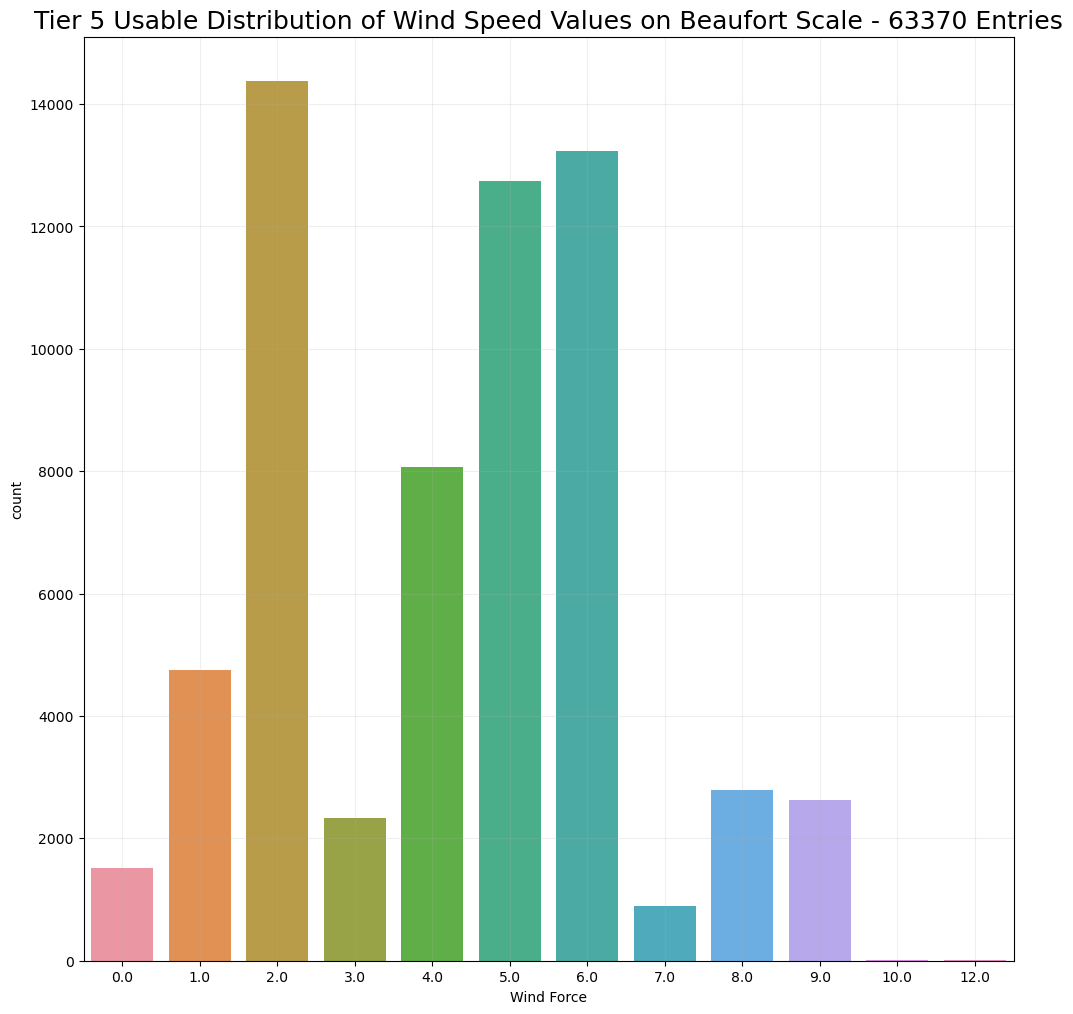

In [6]:
print('Number of entries covered by the mapping so far: ',np.size(df_u['Wind Force']))

f, ax = plt.subplots(figsize = (12,12))
sns.countplot(x=df_u["Wind Force"])
ax.grid(alpha=0.2)

# Change for each tier
plt.title('Tier 5 Usable Distribution of Wind Speed Values on Beaufort Scale - 63370 Entries',fontsize=18)
plt.savefig(os.path.join(Data, 'Tier5_Distribution_Beaufort Scale_May13_24.png'),dpi=300,bbox_inches='tight')

### Entries per Logbook

Unique Log Books:  167


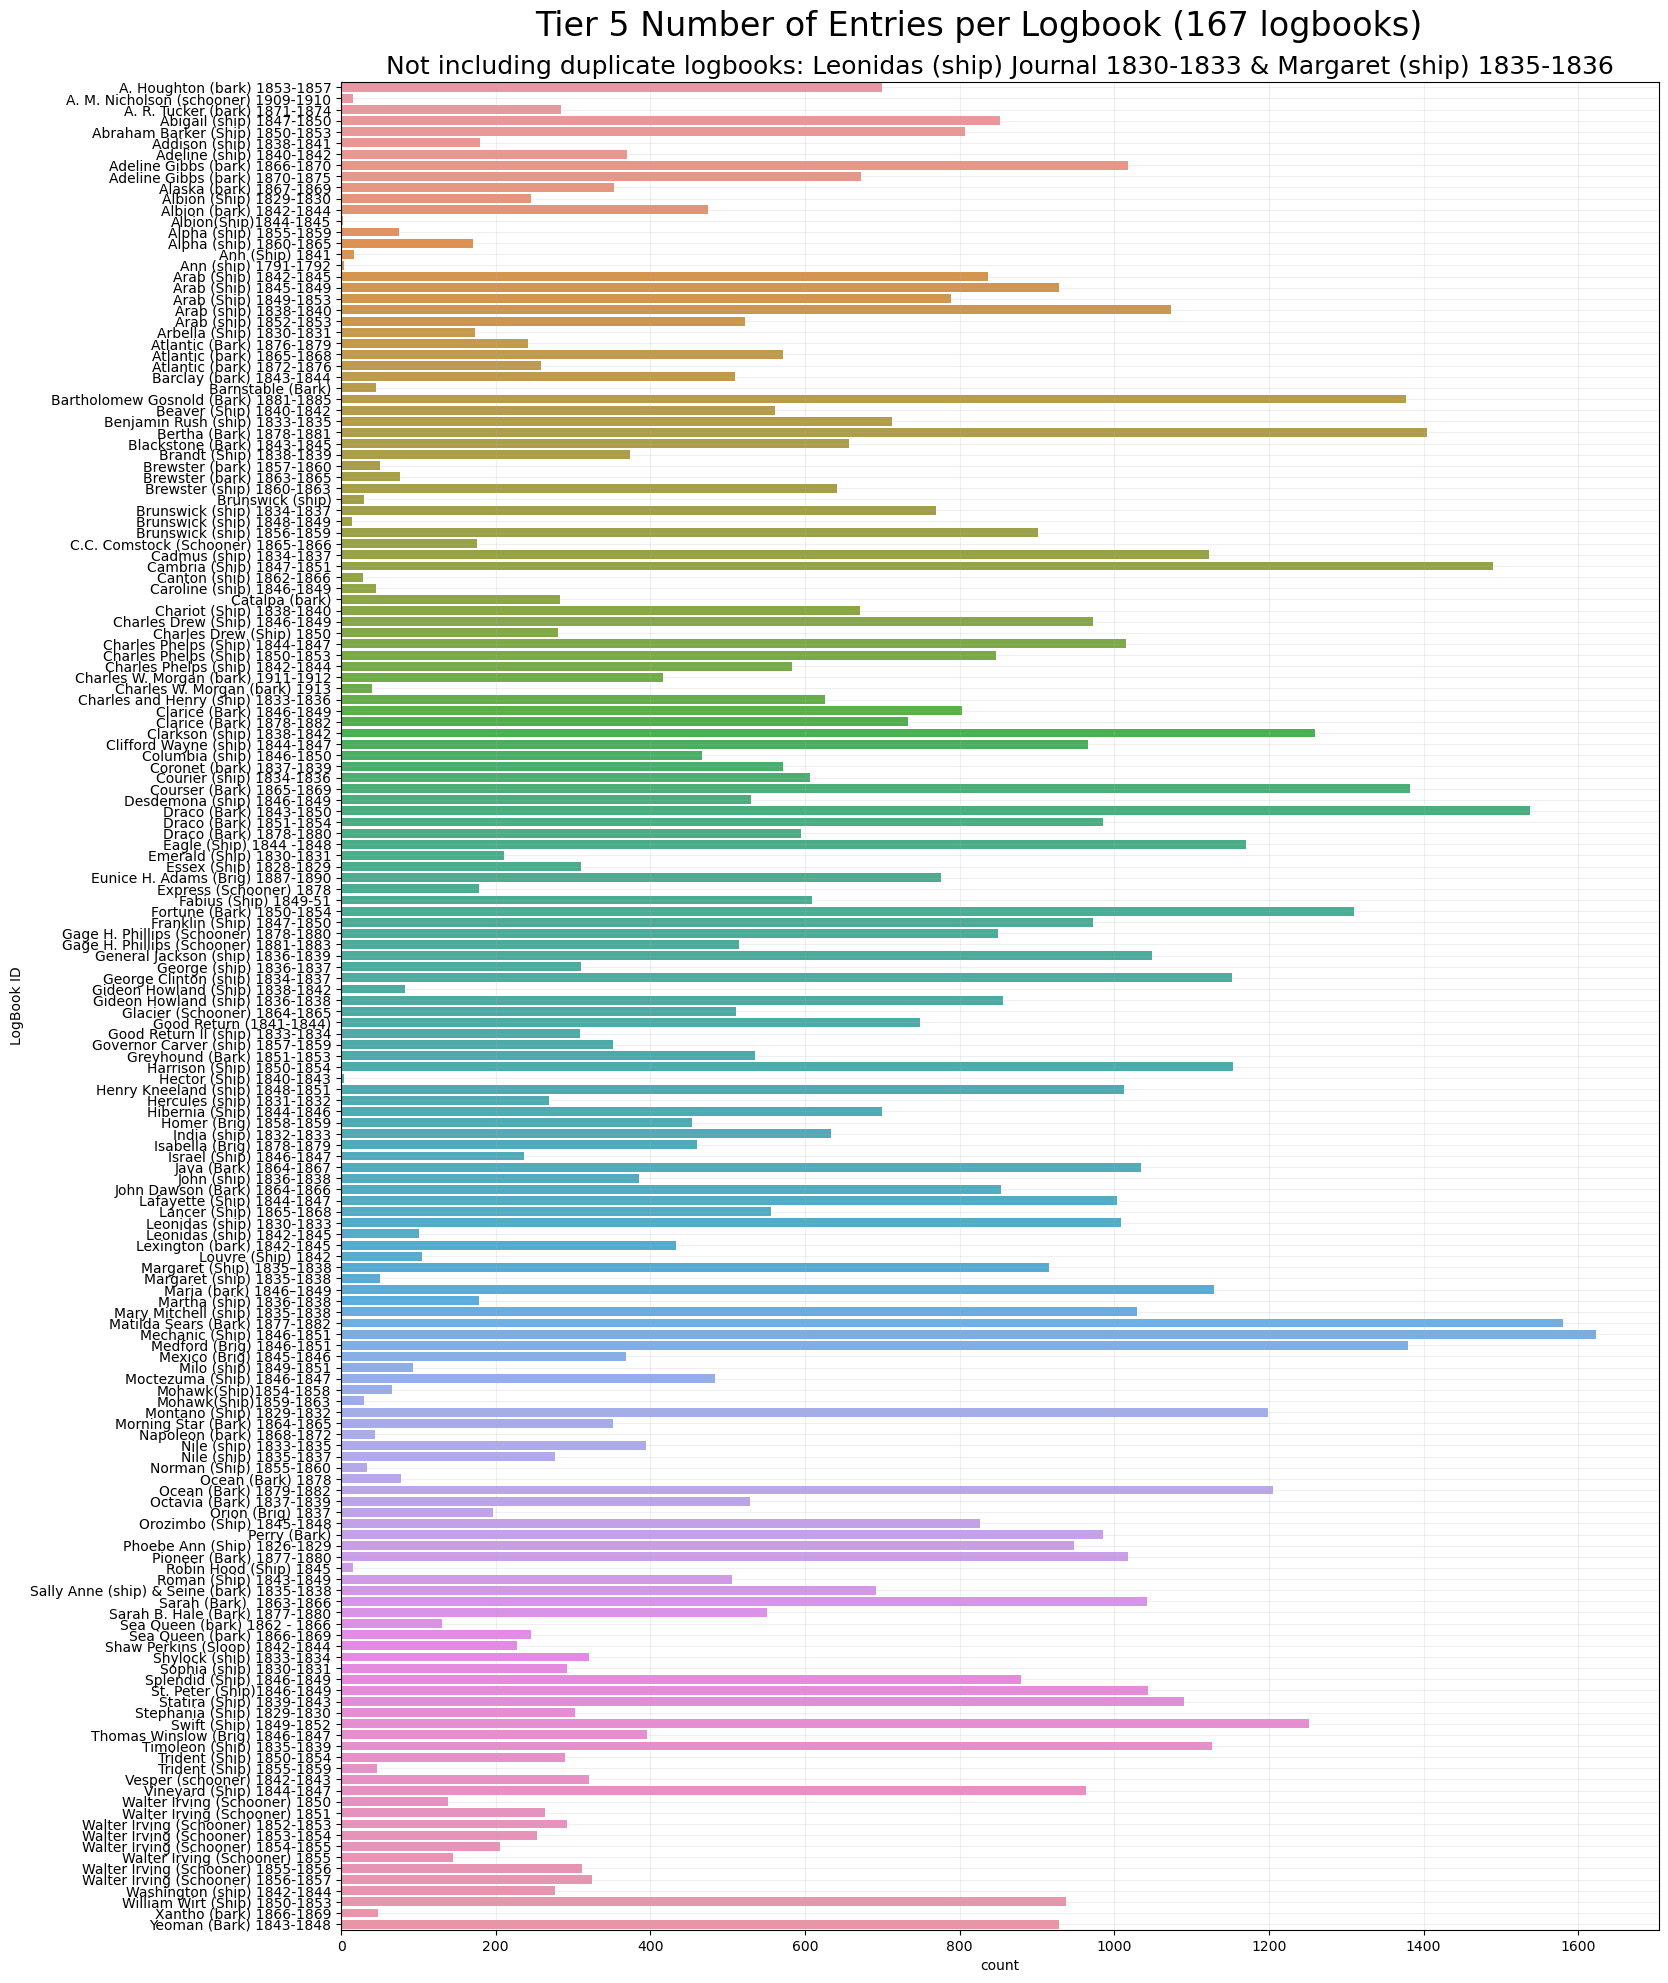

In [7]:
print('Unique Log Books: ',np.size(df["LogBook ID"].unique()))

f,ax = plt.subplots(figsize=(17,24))
sns.countplot(y=df["LogBook ID"])
ax.grid(alpha=0.2)

# Change for each tier
plt.suptitle('Tier 5 Number of Entries per Logbook (167 logbooks)', fontsize=24, y = 0.91)
plt.title('Not including duplicate logbooks: Leonidas (ship) Journal 1830-1833 & Margaret (ship) 1835-1836',fontsize=18)
plt.savefig(os.path.join(Data,'Tier5_No. of Entries per Logbook_May13_24.png'),dpi=300,bbox_inches='tight')


Providence Public Library Logbooks

In [8]:
#df["LogBook ID"].sort_values().unique()
ppl_logbook_ids = [
    "Gideon Howland (Ship) 1838-1842",
    "Louvre (Ship) 1842",
    "Martha (ship) 1836-1838",
    "Ann (Ship) 1841",
    "Greyhound (Bark) 1851-1853",
    "Octavia (Bark) 1837-1839",
    "Timoleon (Ship) 1835-1839",
    "Lancer (Ship) 1865-1868",
    "Draco (Bark) 1851-1854",
    "John (ship) 1836-1838",
    "Chariot (Ship) 1838-1840",
    "Brandt (Ship) 1838-1839",
    "William (Brig) 1838",
    "Orion (Brig) 1837",
    "William Wirt (Ship) 1850-1853",
    "Gideon Howland (ship) 1836-1838",
    "Walter Irving (Schooner) 1856-1857",
    "Walter Irving (Schooner) 1855-1856",
    "George (ship) 1836-1837",
    "Walter Irving (Schooner) 1855",
    "Walter Irving (Schooner) 1854-1855",
    "Walter Irving (Schooner) 1853-1854",
    "Ocean (Bark) 1879-1882",
    "Ocean (Bark) 1878",
    "Walter Irving (Schooner) 1852-1853",
    "Walter Irving (Schooner) 1851",
    "Isabella (Brig) 1878-1879",
    "Courser (Bark) 1865-1869",
    "General Jackson (ship) 1836-1839",
    "Walter Irving (Schooner) 1850",
    "Beaver (Ship) 1840-1842",
    "Hector (Ship) 1840-1843",
    "Statira (Ship) 1839-1843",
    "Trident (Ship) 1855-1859",
    "Gage H. Phillips (Schooner) 1881-1883",
    "Trident (Ship) 1850-1854",
    "Glacier (Schooner) 1864-1865",
    "Gage H. Phillips (Schooner) 1878-1880",
    "Sally Anne (ship) & Seine (bark) 1835-1838",
    "Express (Schooner) 1878",
    "C.C. Comstock (Schooner) 1865-1866",
    "Nile (ship) 1835-1837",
    "Draco (Bark) 1878-1880",
    "Harrison (Ship) 1850-1854",
    "Clarice (Bark) 1878-1882",
    "Margaret (ship) 1835-1838",
    "Shaw Perkins (Sloop) 1842-1844",
    "John Dawson (Bark) 1864-1866",
    "Bertha (Bark) 1878-1881",
    "Morning Star (Bark) 1864-1865",
    "Sarah B. Hale (Bark) 1877-1880",
    "Fortune (Bark) 1850-1854",
    "George Clinton (ship) 1834-1837",
    "Charles Phelps (Ship) 1850-1853",
    "Charles Drew (Ship) 1850",
    "Pioneer (Bark) 1877-1880",
    "Pioneer (Bark) 1877-1880",
    "Abraham Barker (Ship) 1850-1853",
    "Java (Bark) 1864-1867",
    "Brunswick (ship) 1834-1837",
    "Perry (Bark)",
    "Shylock (ship) 1833-1834",
    "Swift (Ship) 1849-1852",
    "Sarah (Bark) 1863-1866",
    "Fabius (Ship) 1849-51",
    "Matilda Sears (Bark) 1877-1882",
    "Cadmus (ship) 1834-1837",
    "Yeoman (Bark) 1843-1848",
    "Courier (ship) 1834-1836",
    "Roman (Ship) 1843-1849",
    "Nile (ship) 1833-1835",
    "Good Return II (ship) 1833-1834",
    "Cambria (Ship) 1847-1851",
    "Charles and Henry (ship) 1833-1836",
    "Benjamin Rush (ship) 1833-1835",
    "Splendid (Ship) 1846-1849",
    "India (ship) 1832-1833",
    "Draco (Bark) 1843-1850",
    "Robin Hood (Ship) 1845",
    "St. Peter (Ship)1846-1849",
    "Moctezuma (Ship) 1846-1847",
    "Sophia (ship) 1830-1831",
    "Medford (Brig) 1846-1851",
    "Leonidas (ship) Journal 1830-1833",
    "Mechanic (Ship) 1846-1851",
    "Blackstone (Bark) 1843-1845",
    "Israel (Ship) 1846-1847",
    "Leonidas (ship) 1830-1833",
    "Eunice H. Adams (Brig) 1887-1890",
    "Hercules (ship) 1831-1832",
    "Emerald (Ship) 1830-1831",
    "Charles Drew (Ship) 1846-1849",
    "Albion (Ship) 1829-1830",
    "Orozimbo (Ship) 1845-1848",
    "Mexico (Brig) 1845-1846",
    "Montano (Ship) 1829-1832",
    "Barclay (bark) 1843-1844",
    "Stephania (Ship) 1829-1830",
    "Arbella (Ship) 1830-1831",
    "Vineyard (Ship) 1844-1847",
    "Essex (Ship) 1828-1829",
    "Lafayette (Ship) 1844-1847",
    "Leonidas (ship) 1842-1845",
    "Phoebe Ann (Ship) 1826-1829",
    "Lexington (bark) 1842-1845",
    "Abigail (ship) 1847-1850",
    "Vesper (schooner) 1842-1843",
    "Clarice (Bark) 1846-1849",
    "Thomas Winslow (Brig) 1846-1847",
    "Charles Phelps (ship) 1842-1844",
    "Charles Phelps (Ship) 1844-1847",
    "Hibernia (Ship) 1844-1846"
]

#subsetting to PPL LogBook IDs
df_PPL = df[df["LogBook ID"].isin(ppl_logbook_ids)]

Unique Log Books from PPL:  108


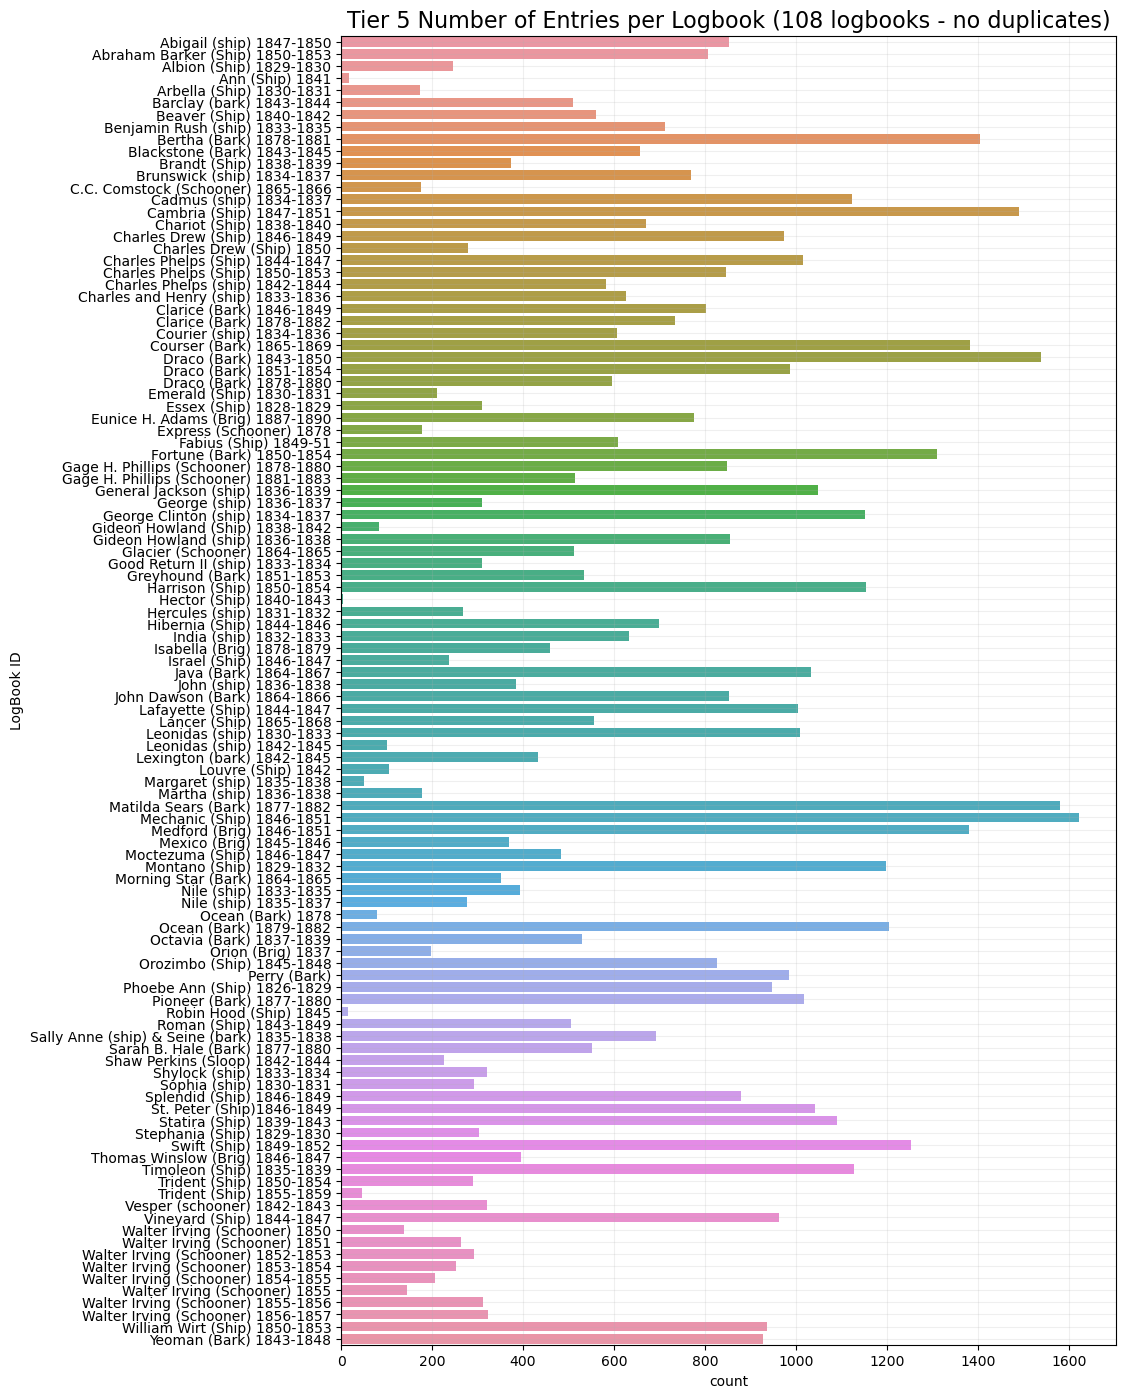

In [9]:
print('Unique Log Books from PPL: ',np.size(df_PPL["LogBook ID"].unique()))

f,ax = plt.subplots(figsize=(10,17))
sns.countplot(y=df_PPL["LogBook ID"])
ax.grid(alpha=0.2)

# Change for each tier
plt.title('Tier 5 Number of Entries per Logbook (108 logbooks - no duplicates)',fontsize=16)
plt.savefig(os.path.join(Data,'Tier5_No. of Entries per Logbook_PPL_May13_24.png'),dpi=300,bbox_inches='tight')


### Entries per Year

Number of years:  71
[1853. 1854. 1855. 1856. 1909. 1910. 1871. 1872. 1873. 1874. 1847. 1848.
 1849. 1850. 1851. 1852. 1838. 1839. 1841. 1842. 1866. 1867. 1868. 1869.
 1870. 1875.   nan 1829. 1830. 1843. 1844. 1860. 1792. 1845. 1846. 1840.
 1831. 1876. 1877. 1878. 1865. 1881. 1882. 1883. 1884. 1885. 1833. 1834.
 1835. 1879. 1880. 1857. 1858. 1859. 1864. 1861. 1862. 1863. 1836. 1837.
 1911. 1912. 1913. 1828. 1887. 1888. 1889. 1890. 1832. 1826. 1827.]

Empty DataFrame
Columns: [DateTime, ID, LogBook ID, Page, Latitude, Longitude, Infilled, Depth, Depth Unit, Bottom, Landmark, Ship Heading/Course, Wind Direction, Wind Speed/Force, Wind Force, Sea State, Cloud Cover, Weather, Ship Sightings, Miscellaneous Observations, wind force, Entry Date Time, Direction, Wind Direction Before, coord_diff, usable, usable_latlon, usable_lat, One Day Dist, One Day Lat, One Day Lon, Tier2_usable, Tier2_new, Two Day Dist, Tier 3 Infilled, Two Day Lat, Two Day Lon, Tier3_usable, Tier3_new, Three Day Dist, Ti

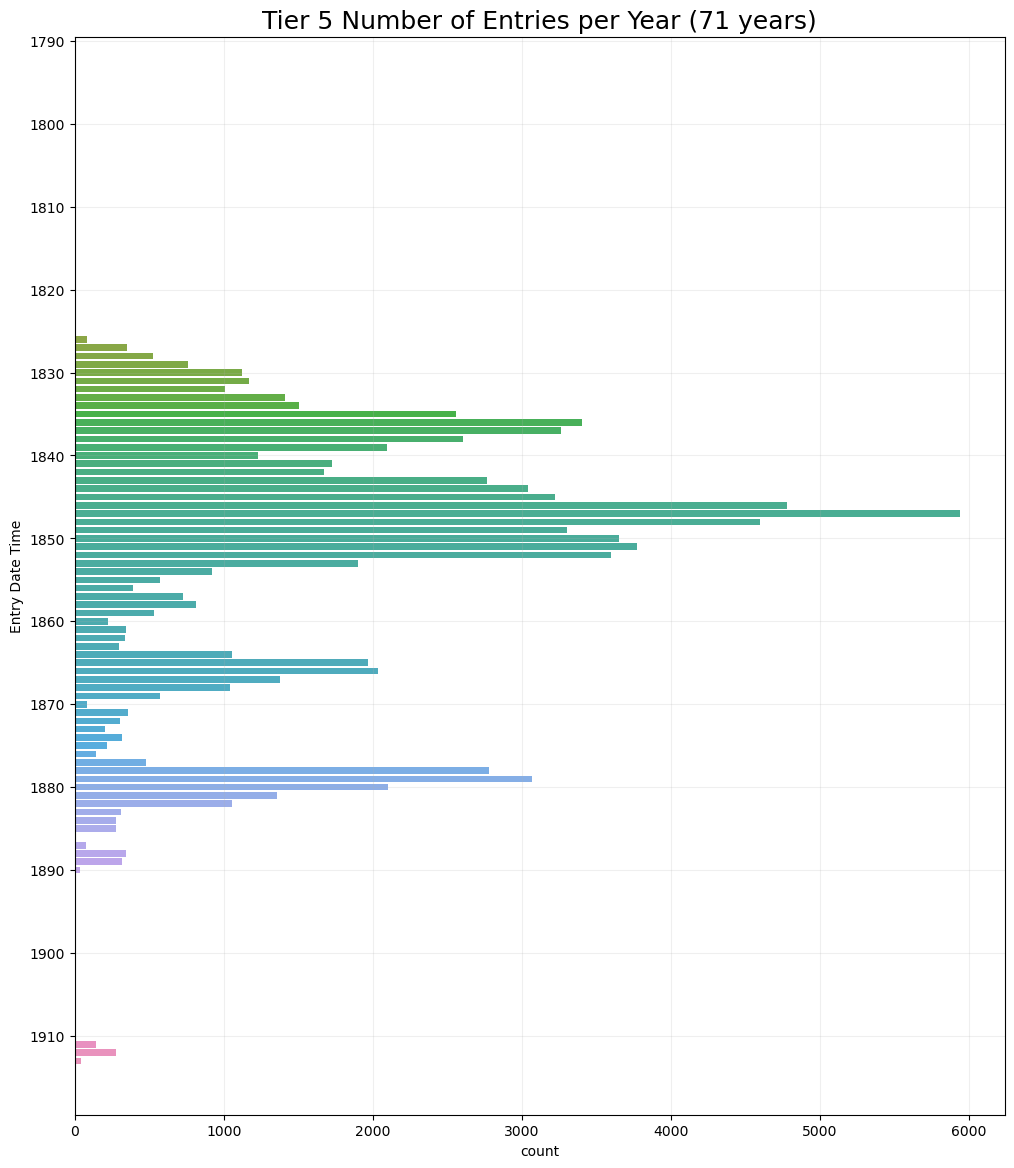

In [10]:
print('Number of years: ',np.size(df["Entry Date Time"].dt.year.unique()))
print(df["Entry Date Time"].dt.year.unique())
print()
print(df.loc[df["Entry Date Time"].dt.year==2021.])

# Generate a list of years from 1792 to 1913
all_years = np.arange(1790, 1920)

# Plot the count of entries per year
f, ax = plt.subplots(figsize=(12, 14))
sns.countplot(y=df["Entry Date Time"].dt.year, order=all_years, ax=ax)
ax.grid(alpha=0.2)

# Set y-tick labels to display only every 10 years
#ax.set_yticks(10)
#ax.set_yticklabels(all_years[::10])
tick_spacing = 10
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# Change for each tier
plt.title('Tier 5 Number of Entries per Year (71 years)', fontsize=18)
plt.savefig(os.path.join(Data, 'Tier5_No. of Entries per Year_May13_24.png'), dpi=300, bbox_inches='tight')


# Geographic Focus on Azores/North Atlantic (NA)

In [11]:
# Filtering out all values in the North Atlantic. Coordinate Range is based on: https://marineregions.org/gazetteer.php?p=details&id=1912
df_NA = df_u[(df_u["Latitude"]>-0.936) & (df_u["Longitude"].between(-79.0,12.0059,inclusive="both"))]
#print(df_NA)

### Plotting Geographically Focussed Data in the North Atlantic (NA)

1826 :  (74, 60)
1828 :  (5, 60)
1829 :  (177, 60)
1830 :  (175, 60)
1831 :  (85, 60)
1832 :  (59, 60)
1833 :  (198, 60)
1834 :  (119, 60)
1835 :  (235, 60)
1836 :  (290, 60)
1837 :  (421, 60)
1838 :  (282, 60)
1839 :  (205, 60)
1840 :  (105, 60)
1841 :  (66, 60)
1842 :  (196, 60)
1843 :  (346, 60)
1844 :  (440, 60)
1845 :  (316, 60)
1846 :  (746, 60)
1847 :  (461, 60)
1848 :  (225, 60)
1849 :  (486, 60)
1850 :  (605, 60)
1851 :  (574, 60)
1852 :  (350, 60)
1853 :  (353, 60)
1854 :  (284, 60)
1855 :  (225, 60)
1856 :  (160, 60)
1857 :  (136, 60)
1858 :  (51, 60)
1859 :  (73, 60)
1860 :  (100, 60)
1862 :  (30, 60)
1863 :  (130, 60)
1864 :  (358, 60)
1865 :  (416, 60)
1866 :  (346, 60)
1867 :  (18, 60)
1868 :  (26, 60)
1869 :  (33, 60)
1870 :  (21, 60)
1871 :  (7, 60)
1872 :  (60, 60)
1874 :  (12, 60)
1875 :  (171, 60)
1876 :  (63, 60)
1877 :  (178, 60)
1878 :  (763, 60)
1879 :  (589, 60)
1880 :  (244, 60)
1881 :  (270, 60)
1882 :  (253, 60)
1883 :  (26, 60)
1885 :  (39, 60)
1887 :  (47,

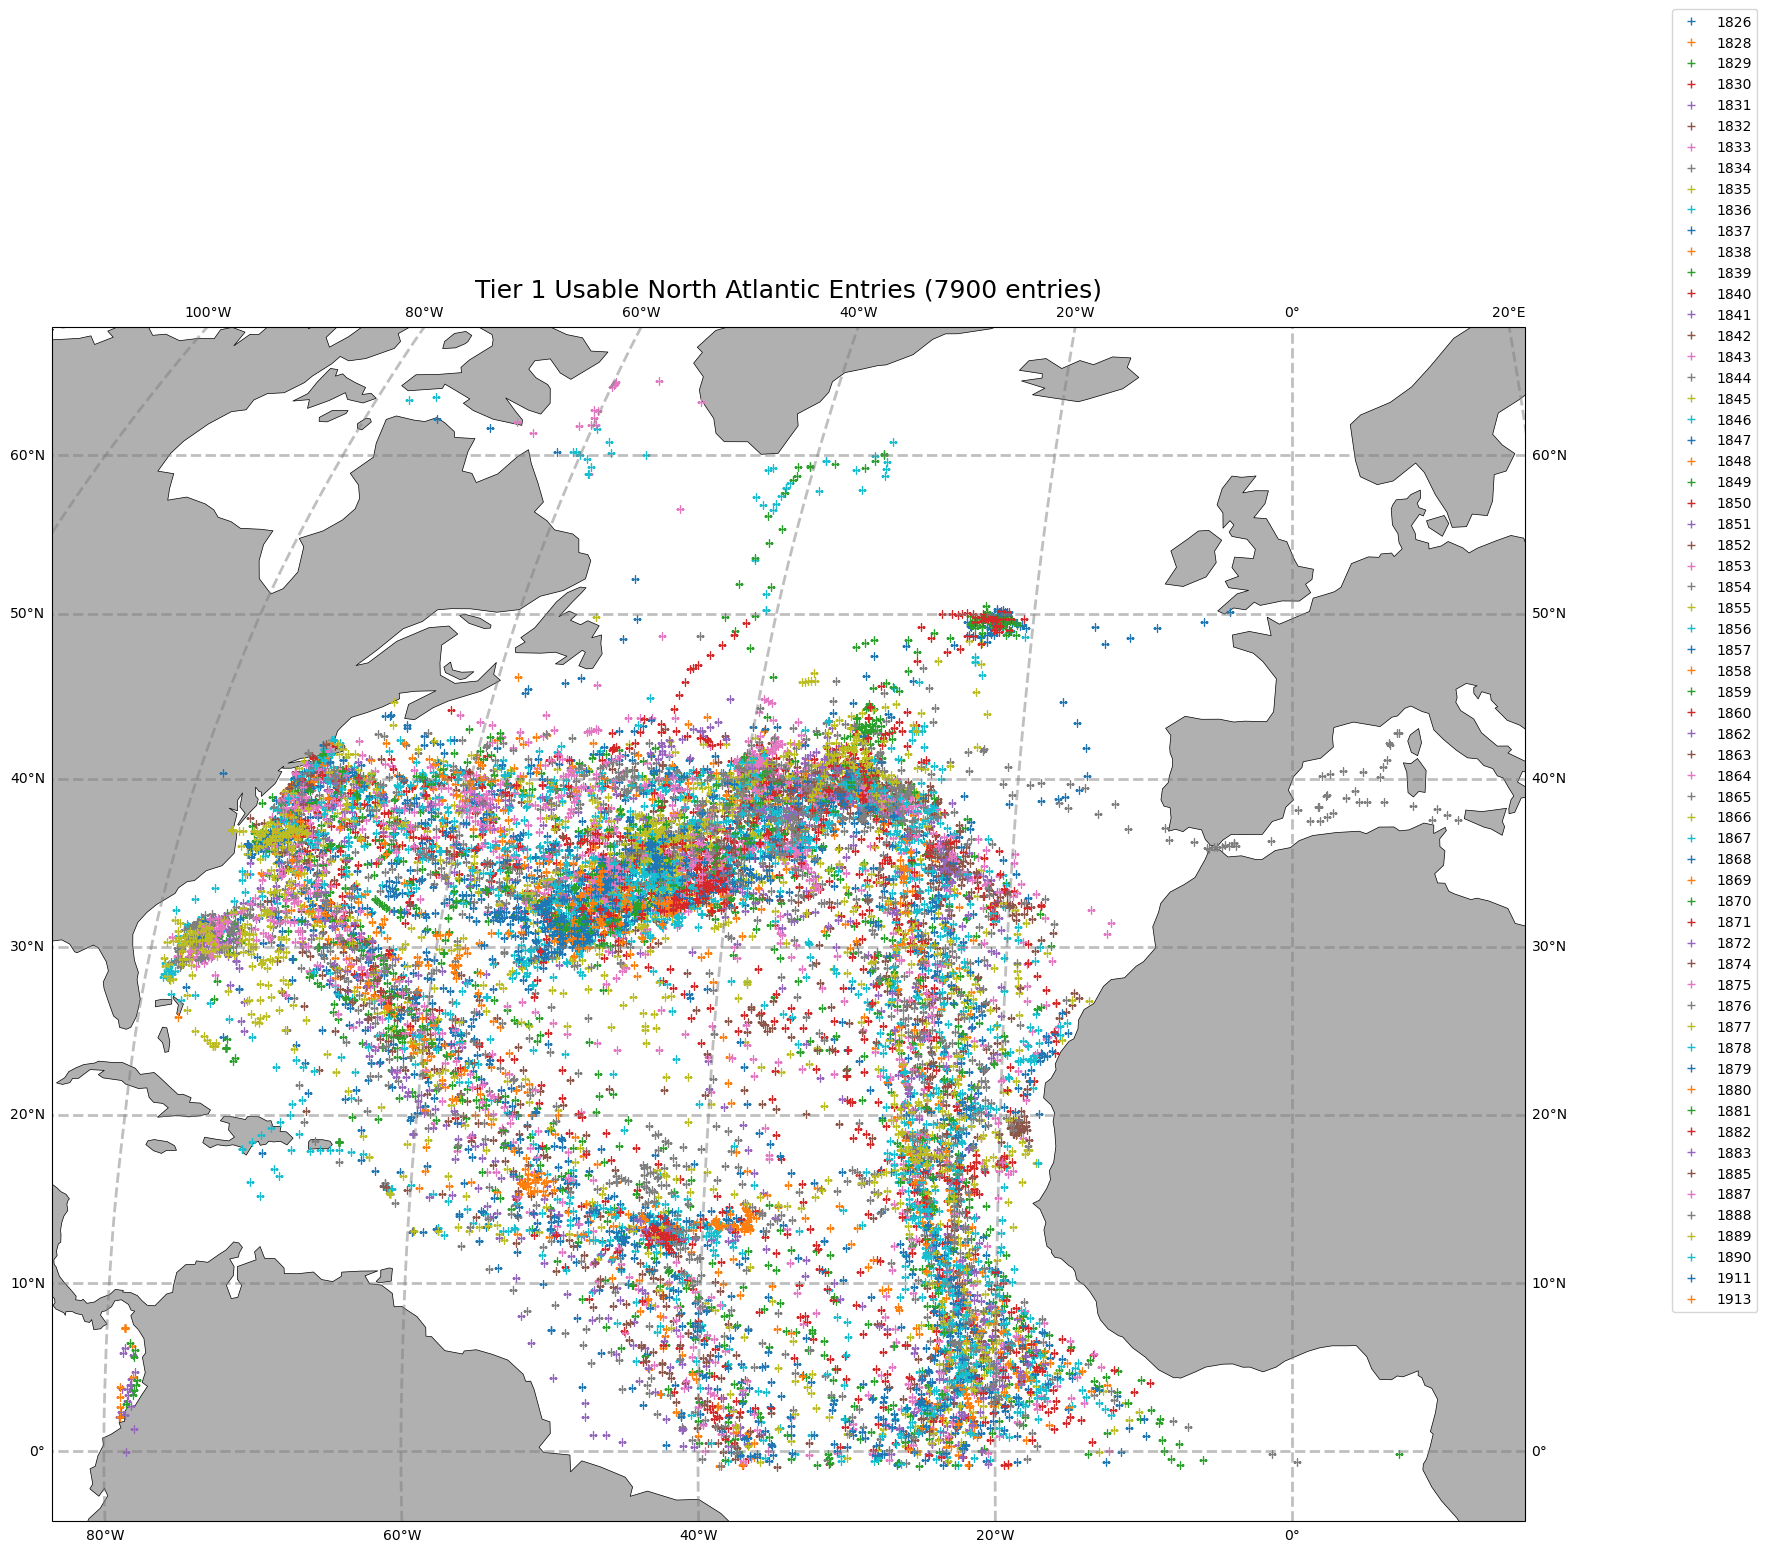

In [12]:
fig, ax = plt.subplots(figsize=(19,20),subplot_kw={'projection':ccrs.Robinson()})
#_ = ax.set_global()
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor='#b0b0b0')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

# Initialize counter for the number of plotted values
num_plotted_values = 0

for yr in sorted(df_NA['Entry Date Time'].dt.year.unique()):
    work = df_NA[df_NA['Entry Date Time'].dt.year == yr]
    _ = ax.plot(work.Longitude, work.Latitude, '+', transform=ccrs.PlateCarree(), label='{:.0f}'.format(yr))
    num_plotted_values += len(work)
    print(yr,': ',np.shape(work))

_ = ax.legend(loc=(1.1,0.175))


# Change for each tier
plt.title('Tier 1 Usable North Atlantic Entries (7900 entries)',fontsize=18)
#fig.savefig(os.path.join(Data, 'Tier1_NA_Unique Years_May13_24.png'),dpi=300,bbox_inches='tight')

# Print the total number of plotted values
print("Total number of plotted values:", num_plotted_values)


Number of years:  62
[1853 1871 1874 1847 1850 1838 1839 1841 1866 1870 1875 1867 1829 1830
 1842 1844 1855 1860 1845 1849 1840 1876 1865 1872 1843 1881 1885 1833
 1878 1879 1836 1848 1856 1834 1837 1851 1862 1846 1852 1911 1913 1869
 1854 1831 1828 1887 1888 1889 1890 1880 1882 1883 1864 1857 1832 1858
 1859 1835 1877 1868 1826 1863]

Empty DataFrame
Columns: [DateTime, ID, LogBook ID, Page, Latitude, Longitude, Infilled, Depth, Depth Unit, Bottom, Landmark, Ship Heading/Course, Wind Direction, Wind Speed/Force, Wind Force, Sea State, Cloud Cover, Weather, Ship Sightings, Miscellaneous Observations, wind force, Entry Date Time, Direction, Wind Direction Before, coord_diff, usable, usable_latlon, usable_lat, One Day Dist, One Day Lat, One Day Lon, Tier2_usable, Tier2_new, Two Day Dist, Tier 3 Infilled, Two Day Lat, Two Day Lon, Tier3_usable, Tier3_new, Three Day Dist, Tier 4 Infilled, Three Day Lat, Three Day Lon, Four Day Dist, Four Day Lat, Four Day Lon, Five Day Dist, Five Day Lat, 

Text(0.5, 1.0, 'Tier 1 Number of Entries per Year (NA), 62 years')

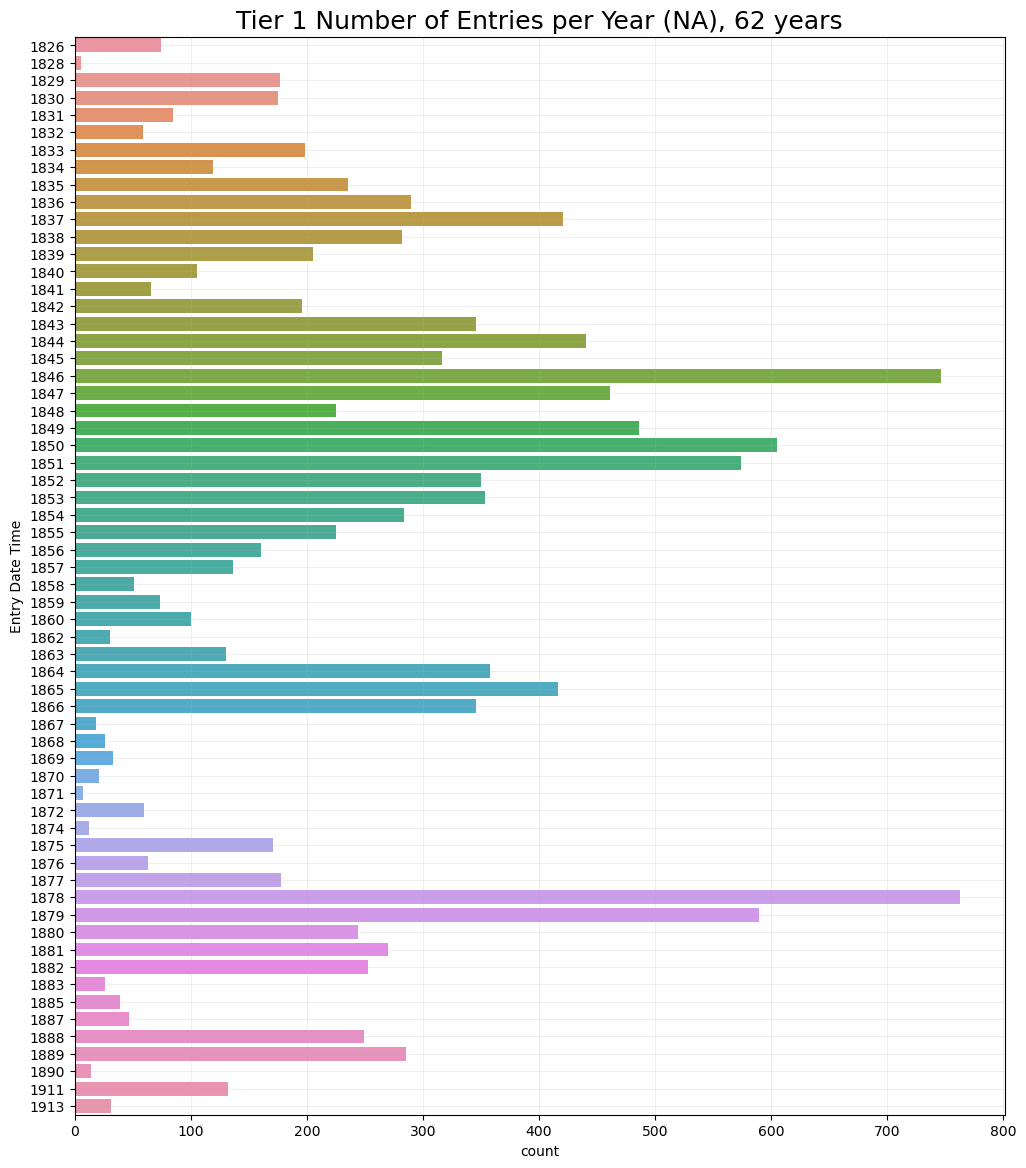

In [13]:
# Number of Entries per Year after Filtering NA values
print('Number of years: ',np.size(df_NA["Entry Date Time"].dt.year.unique()))
print(df_NA["Entry Date Time"].dt.year.unique())
print()
print(df_NA.loc[df_NA["Entry Date Time"].dt.year==2021.])

f,ax = plt.subplots(figsize=(12,14))
sns.countplot(y=df_NA["Entry Date Time"].dt.year)
ax.grid(alpha=0.2)

# Change for each tier
plt.title('Tier 1 Number of Entries per Year (NA), 62 years',fontsize=18)
#plt.savefig(os.path.join(Data, 'Tier1_No. of Entries per Year_NA.png'),dpi=200,bbox_inches='tight')


Unique Log Books:  152


Text(0.5, 1.0, 'Tier 1 Number of Entries per Logbook (NA), 150')

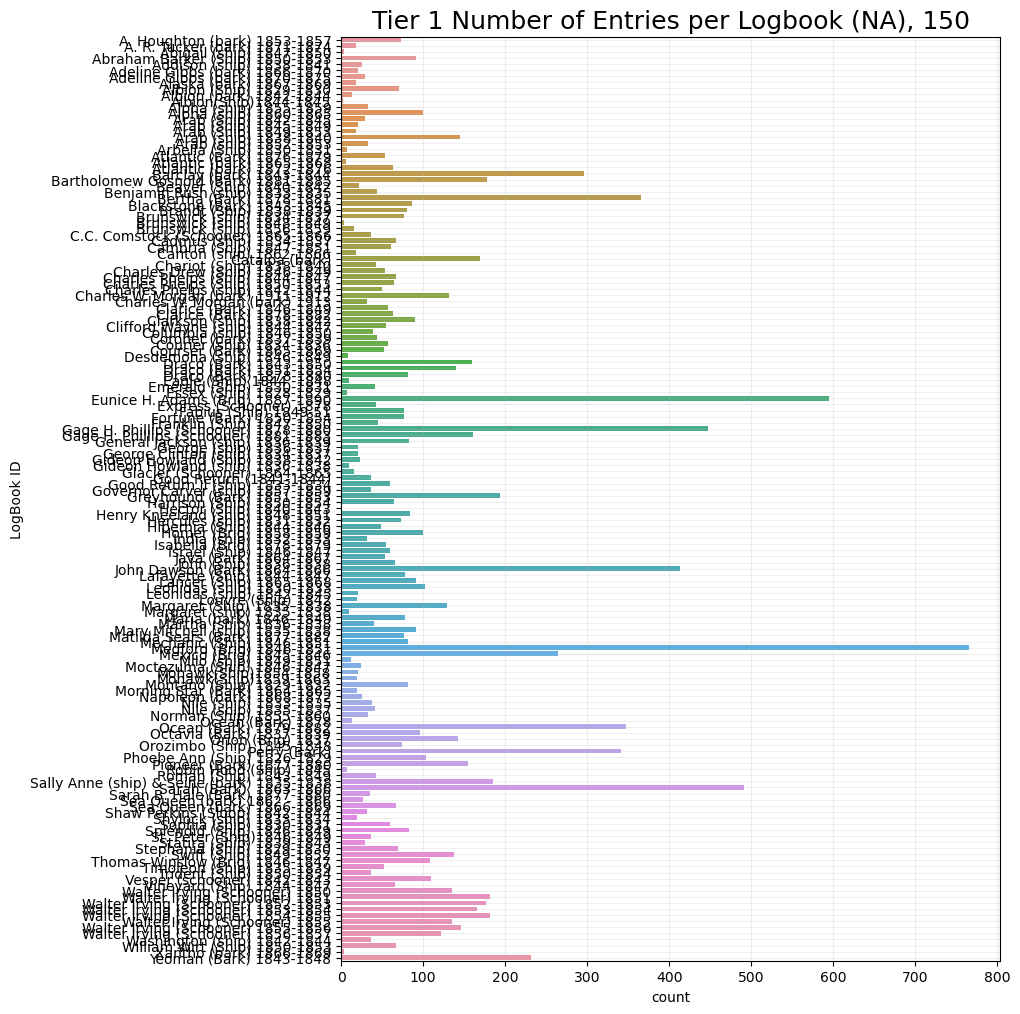

In [14]:
# Number of Entries per Logbook (NA)
print('Unique Log Books: ',np.size(df_NA["LogBook ID"].unique()))

f,ax = plt.subplots(figsize=(8.5,12))
sns.countplot(y=df_NA["LogBook ID"])
ax.grid(alpha=0.2)

# Change for each tier
plt.title('Tier 1 Number of Entries per Logbook (NA), 150',fontsize=18)
#plt.savefig(os.path.join(Data, 'Tier1_No. of Entries per Logbook_NA.png'),dpi=200,bbox_inches='tight')


### Year 1875: VEI5 level Eruption associated with Askja Caldera in Iceland

'Volta do Mar' navigational technique based on Portugal Current

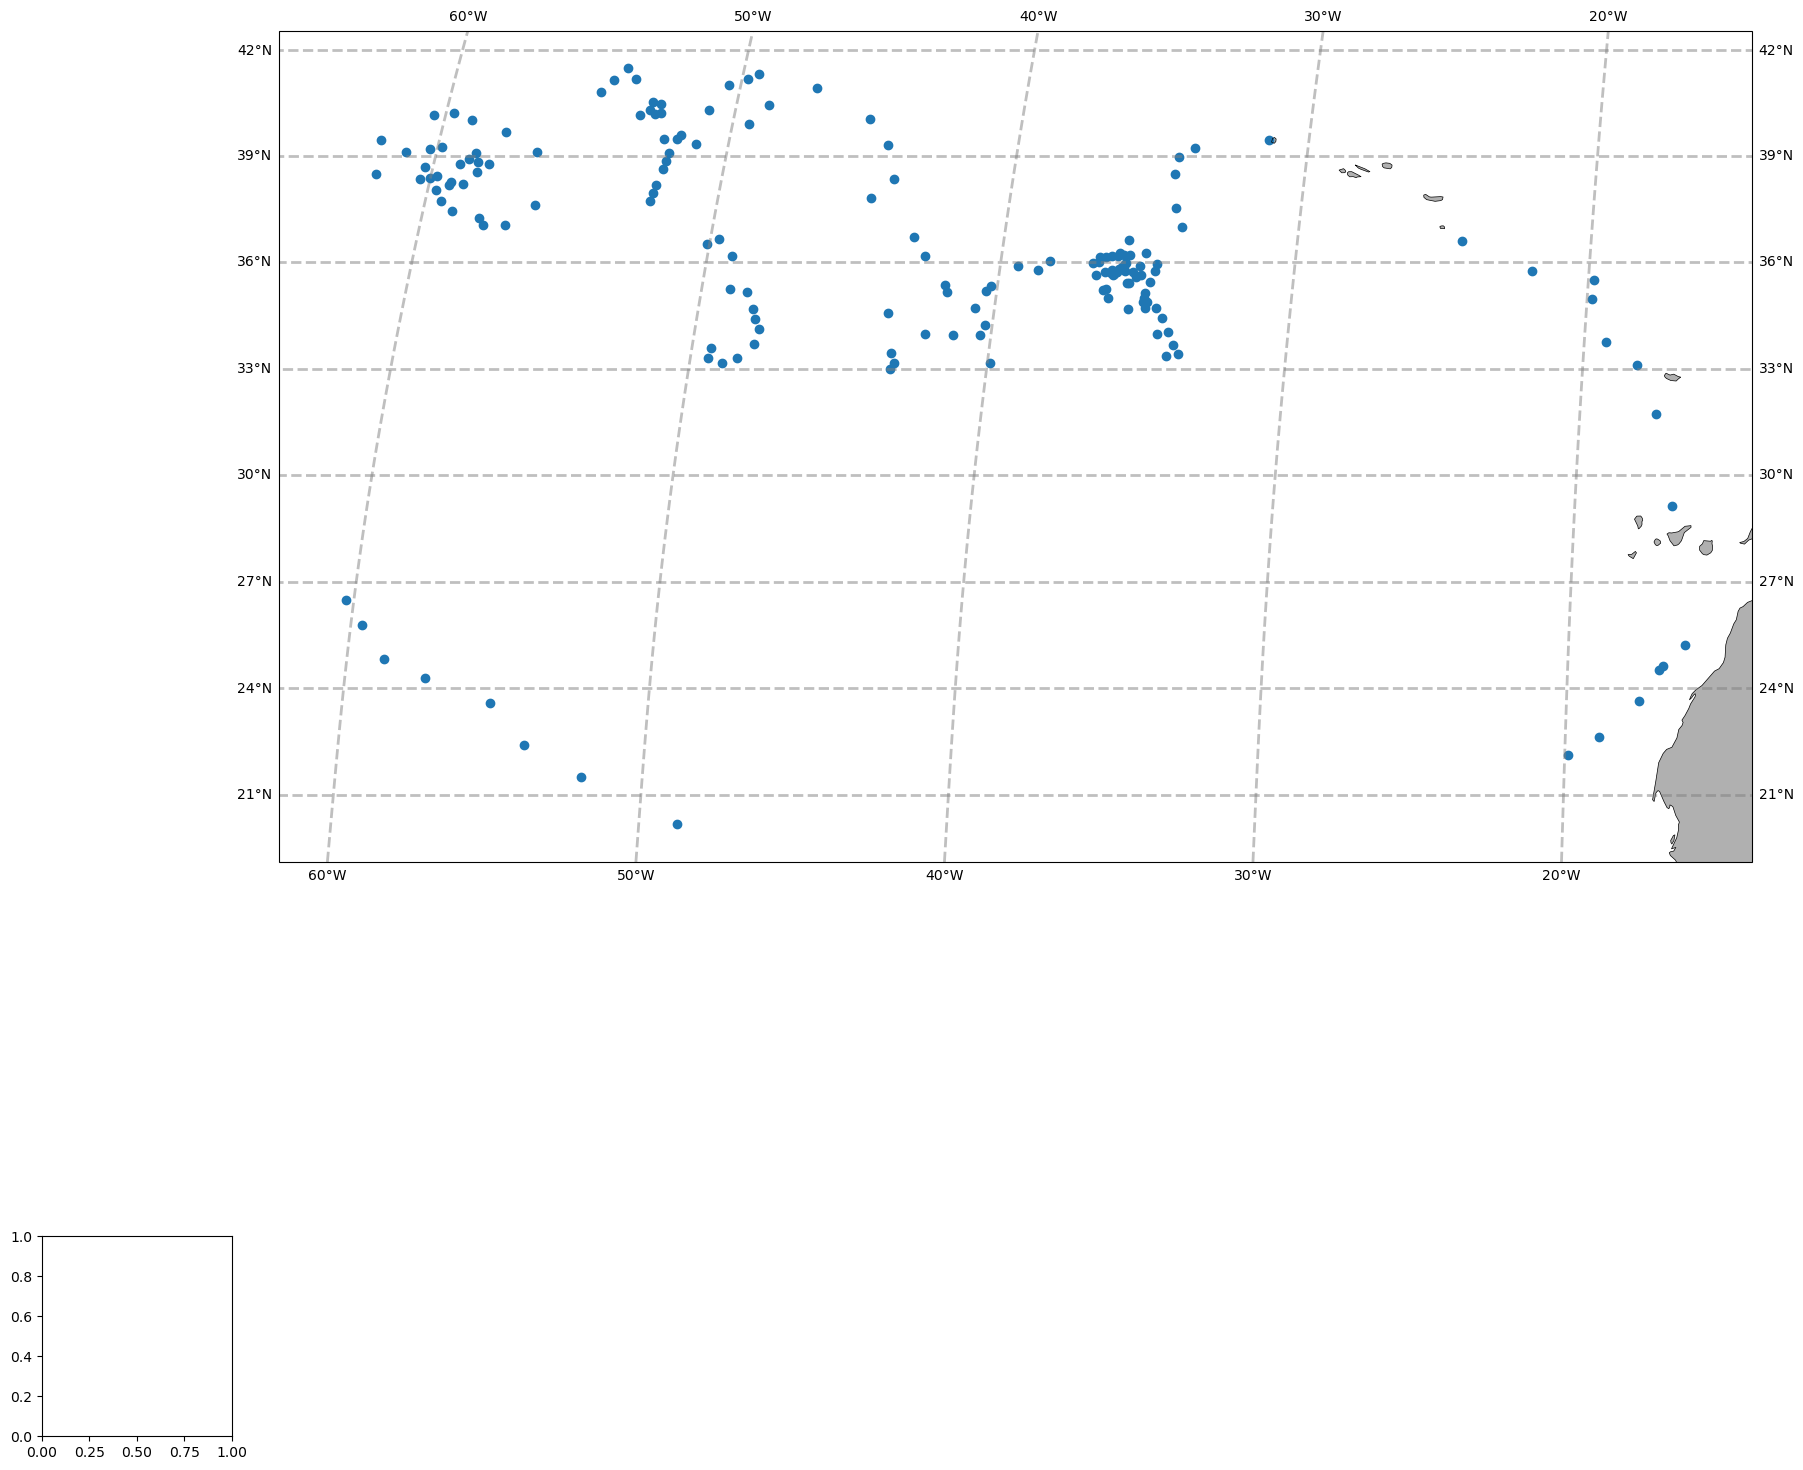

In [15]:
# Plotting 1875 data in the NA
year = 1875
work = df_NA[df_NA['Entry Date Time'].dt.year == year]
lon = work.Longitude
lat = work.Latitude
ws = work['Wind Force']

fig, ax = plt.subplots(figsize=(19,20),subplot_kw={'projection':ccrs.Robinson()})
#_ = ax.set_global()
#_ = ax.set_extent([-80, 0, 5, 60])
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor='#b0b0b0')
#_ = ax.title('Logbook entries in the North Atlantic in 1875',fontsize=18)
cbar_ax = fig.add_axes([0, 0, 0.1, 0.1])

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

_ = ax.scatter(lon, lat, transform=ccrs.PlateCarree())
#_ = ax.colorbar()


#_ = ax.legend(loc=(1.1,-0.175))

#fig.savefig(os.path.join(Data, 'Tier1_NA_1875_Mar13.png'),dpi=200,bbox_inches='tight')

Number of NA entries in 1875:  (171, 60)



Text(0.5, 1.0, 'Number of Entries per Month in 1875')

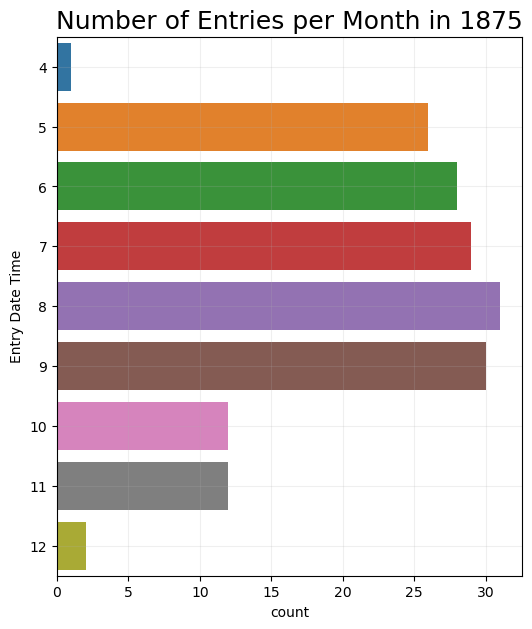

In [16]:
# Number of Entries per month in 1875
print('Number of NA entries in 1875: ',np.shape(df_NA[df_NA['Entry Date Time'].dt.year == 1875]))
#print(df_NA[df_NA["Entry Date Time"]==1875,'LogBook ID'].str.unique())
print()

df_NA_1875 = df_NA[df_NA['Entry Date Time'].dt.year == 1875]

f,ax = plt.subplots(figsize=(6,7))
sns.countplot(y=df_NA_1875["Entry Date Time"].dt.month)
ax.grid(alpha=0.2)
plt.title('Number of Entries per Month in 1875',fontsize=18)

Number of NA entries in 1874:  (12, 60)



Text(0.5, 1.0, 'Number of Entries per Month in 1874')

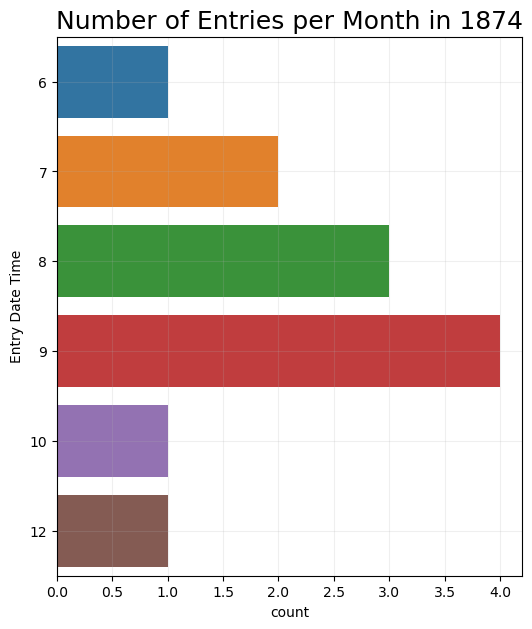

In [17]:
# Number of Entries per month in 1874
print('Number of NA entries in 1874: ',np.shape(df_NA[df_NA['Entry Date Time'].dt.year == 1874]))
#print(df_NA[df_NA["Entry Date Time"]==1874,'LogBook ID'].str.unique())
print()

df_NA_1874 = df_NA[df_NA['Entry Date Time'].dt.year == 1874]

f,ax = plt.subplots(figsize=(6,7))
sns.countplot(y=df_NA_1874["Entry Date Time"].dt.month)
ax.grid(alpha=0.2)
plt.title('Number of Entries per Month in 1874',fontsize=18)

### Average Daily Wind Speed

In [18]:
# Defining Range of Dates over which to iterate
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = np.min(df['Entry Date Time'])
end_date = np.max(df['Entry Date Time'])
end_date += datetime.timedelta(days=1)
dates = []
for single_date in daterange(start_date, end_date):
    dates.append(single_date)
print(np.size(dates))

44321


In [19]:
# Estimating Duplicate Data Entries per day (whole dataset)
counter = 0
for i in dates:
    cumsum=[]
    if np.size(df.loc[df["Entry Date Time"]==i,'Wind Force'])>1:
        cumsum = np.size(df.loc[df["Entry Date Time"]==i,'Wind Force'])
        counter += 1

#print(np.size(daily_ws))
print(counter,' out of ',np.size(df["Wind Force"]),' overall entries have multiple entries on the same day')

14787  out of  94861  overall entries have multiple entries on the same day


In [20]:
# Estimating Duplicate Data Entries per day (NA dataset)
counter = 0
for i in dates:
    cumsum=[]
    if np.size(df_NA.loc[df_NA["Entry Date Time"]==i,'Wind Force'])>1:
        cumsum = np.size(df_NA.loc[df_NA["Entry Date Time"]==i,'Wind Force'])
        counter += 1

#print(np.size(daily_ws))
print(counter,' out of ',np.size(df_NA["Wind Force"]),' NA entries have multiple entries on the same day')

2946  out of  13434  NA entries have multiple entries on the same day


### How many Entries are 'usable', i.e. exhibit Lat./Lon. and Wind Speed values?

In [21]:
df_NA['usable'] = (df_NA["Latitude"].notna() & df_NA["Longitude"].notna() & df_NA["Wind Force"].notna())
df_NA.loc[df_NA['usable']==True]

/tmp/ipykernel_23020/3110634449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NA['usable'] = (df_NA["Latitude"].notna() & df_NA["Longitude"].notna() & df_NA["Wind Force"].notna())


,DateTime,ID,LogBook ID,Page,Latitude,Longitude,Infilled,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Wind Force,Sea State,Cloud Cover,Weather,Ship Sightings,Miscellaneous Observations,wind force,Entry Date Time,Direction,Wind Direction Before,coord_diff,...,Two Day Lat,Two Day Lon,Tier3_usable,Tier3_new,Three Day Dist,Tier 4 Infilled,Three Day Lat,Three Day Lon,Four Day Dist,Four Day Lat,Four Day Lon,Five Day Dist,Five Day Lat,Five Day Lon,Tier4_usable,Tier4_new,Six Day Dist,Tier 5 Infilled,Six Day Lat,Six Day Lon,Seven Day Dist,Seven Day Lat,Seven Day Lon,Tier5_usable,Tier5_new
94876,1853-07-07 12:00:00,2443.0,A. Houghton (bark) 1853-1857,NaN,37.250000,-55.066667,False,NaN,NaN,NaN,NaN,NaN,225.0,fresh breezes,5.0,NaN,NaN,NaN,NaN,NaN,False,1853-07-07 12:00:00,nan,SW,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
94874,1853-07-09 12:00:00,2446.0,A. Houghton (bark) 1853-1857,NaN,33.750000,-52.466667,False,NaN,NaN,NaN,NaN,SSE,225.0,light,2.0,NaN,NaN,fine,NaN,NaN,False,1853-07-09 12:00:00,nan,SW,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
94873,1853-07-10 12:00:00,2447.0,A. Houghton (bark) 1853-1857,NaN,33.333333,-53.716667,False,NaN,NaN,NaN,NaN,S,NaN,light airs,1.0,calms,NaN,NaN,NaN,NaN,False,1853-07-10 12:00:00,nan,NaN,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
94871,1853-07-12 12:00:00,2449.0,A. Houghton (bark) 1853-1857,NaN,33.816667,-53.066667,False,NaN,NaN,NaN,NaN,NaN,135.0,moderate winds,4.0,NaN,NaN,clear,NaN,NaN,False,1853-07-12 12:00:00,nan,SE,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
94870,1853-07-13 12:00:00,2450.0,A. Houghton (bark) 1853-1857,NaN,33.916667,-52.650000,False,NaN,NaN,NaN,NaN,NaN,180.0,light winds,2.0,NaN,NaN,pleasant,NaN,NaN,False,1853-07-13 12:00:00,nan,S,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32534,1846-08-30 12:00:00,66376.0,Yeoman (Bark) 1843-1848,NaN,34.925000,-45.250000,True,NaN,NaN,NaN,NaN,W,90.0,moderate breezes,4.0,NaN,NaN,NaN,NaN,NaN,False,1846-08-30 12:00:00,nan,E,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
32533,1846-08-31 12:00:00,66377.0,Yeoman (Bark) 1843-1848,NaN,34.500000,-45.333333,False,NaN,NaN,NaN,NaN,SW,0.0,light winds,2.0,NaN,NaN,NaN,NaN,NaN,False,1846-08-31 12:00:00,nan,N,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
32532,1846-09-01 12:00:00,66378.0,Yeoman (Bark) 1843-1848,NaN,34.300000,-45.666667,False,NaN,NaN,NaN,NaN,WSW,315.0,moderate breezes,4.0,NaN,NaN,NaN,NaN,NaN,False,1846-09-01 12:00:00,nan,NW,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
32531,1846-09-02 12:00:00,66379.0,Yeoman (Bark) 1843-1848,NaN,34.450000,-46.150000,False,NaN,NaN,NaN,NaN,WNW,0.0,moderate breezes,4.0,NaN,NaN,NaN,NaN,NaN,False,1846-09-02 12:00:00,nan,N,False,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
